In [107]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.9.1


In [108]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

(0.0, 8.0)

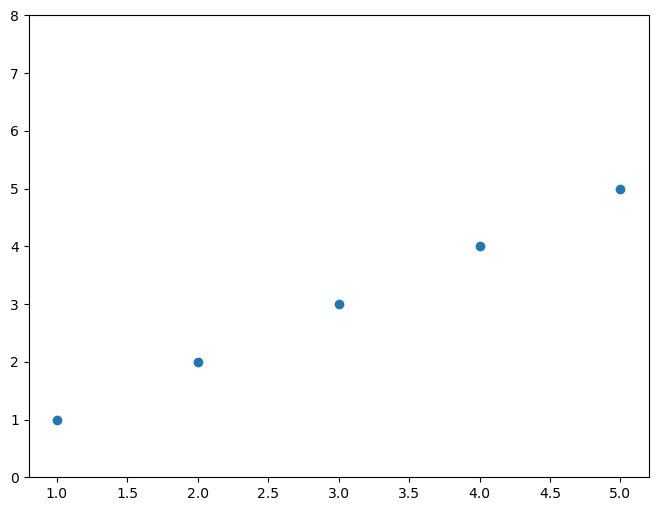

In [109]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

In [110]:
v =[1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

tensorflow는 python list를 사용해도 알아서 numpy로 변환해서 tensor로 만드나 보다

In [111]:
x = [
    [4., 6., 1.],
    [2., 2., 3.]
]
tf.reduce_mean(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3.6666667, 2.3333333], dtype=float32)>

tf.reduce_mean 은 torch.mean 같은 방법으로 쓰면 되는듯

In [112]:
tf.square(3) # 9

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [113]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [114]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [115]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

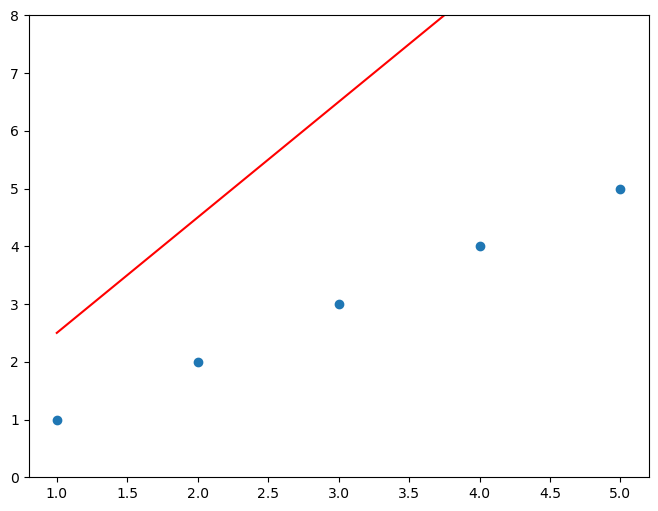

In [116]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

실선이 모델 예측값, 점이 ground truth

In [117]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [118]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

with tf.GradientTape() 를 통해서 연산하는 tensor들의 gradient를 계산

In [119]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

assign_sub 는 -= 같은 것

(0.0, 8.0)

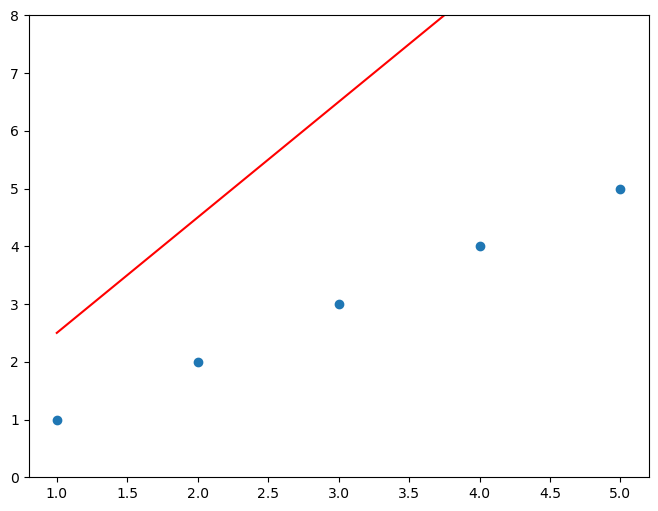

In [120]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026


   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0.0, 8.0)

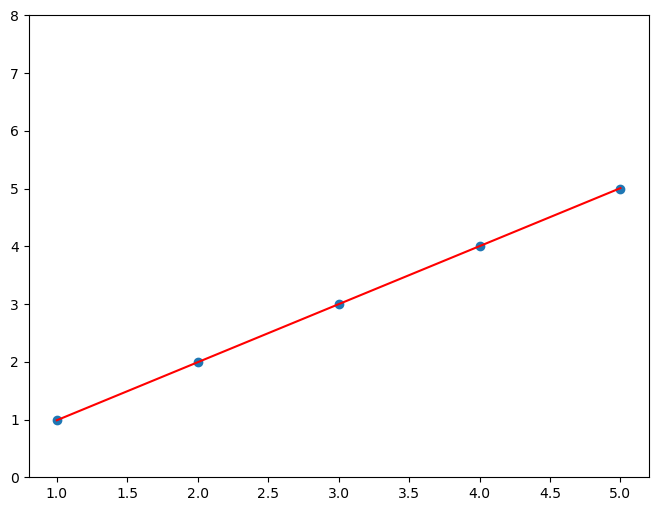

In [121]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

In [122]:
print(W * 5 + b)
print(W * 2.5 + b)
print(W, b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0048164> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.017388742>


W = 1, b = 0 에 가까워지는 것을 볼 수 있다

In [123]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


W가 1일때 prediction과 ground truth 의 차이가 가장 적음

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


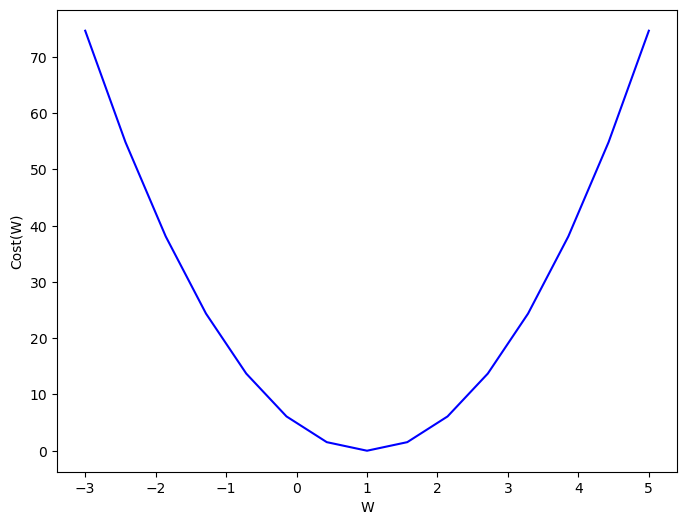

In [124]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))
  
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

Gradient descent algorithm을 사용하려면 cost함수가 Convex function 이어야 한단다
convex function은 그래프가 아래로 볼록한 형태의 미분 가능한 함수 말함
근데 local minimum을 가지는 고차원의 함수에도 적용 가능할텐데 그런 함수까지 convex function이라고 할 수 있는건가
강의에서 말하는 내용은 최적의 해를 찾을 수 있는 함수는 convex function이라고 말하는 것 같음!

In [125]:
tf.random.set_seed(0)  # for reproducibility

In [126]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))
        

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968


   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [127]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)


In [128]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


In [129]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b  = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

learning_rate = tf.Variable(0.001)

print('    i      cost          W1           W2           b')
for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2 * x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    i      cost          W1           W2           b
    0 | 351.808533 |     1.1302 |    -6.0234 |  -6.467658
   50 | 140.418304 |     1.8173 |    -3.1232 |  -5.317189
  100 |  58.373085 |     2.0419 |    -1.2709 |  -4.616140
  150 |  25.359884 |     2.0816 |    -0.0864 |  -4.172924
  200 |  11.781375 |     2.0552 |     0.6709 |  -3.881300
  250 |   6.112636 |     2.0113 |     1.1539 |  -3.680805
  300 |   3.711597 |     1.9677 |     1.4604 |  -3.536181
  350 |   2.671967 |     1.9300 |     1.6531 |  -3.426413
  400 |   2.202548 |     1.8988 |     1.7724 |  -3.338741
  450 |   1.973061 |     1.8731 |     1.8443 |  -3.265294
  500 |   1.845207 |     1.8515 |     1.8856 |  -3.201159
  550 |   1.760961 |     1.8330 |     1.9073 |  -3.143230
  600 |   1.695943 |     1.8166 |     1.9163 |  -3.089536
  650 |   1.639893 |     1.8018 |     1.9171 |  -3.038818
  700 |   1.588473 |     1.7880 |     1.9128 |  -2.990259
  750 |   1.539835 |     1.7750 |     1.9051 |  -2.943333
  800 |   1.493180 

In [130]:
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0))
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))
print(W.shape)

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b # (1, 2) * (2, 5) = (1, 5)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
    
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

(1, 2)
    0 |  42.817757 |    -0.9446 |    -0.7995 |  -0.193534
   50 |  11.277131 |     0.0308 |    -0.2097 |   0.233510


  100 |   3.308418 |     0.4737 |     0.1548 |   0.450509
  150 |   1.117052 |     0.6726 |     0.3833 |   0.561172
  200 |   0.448822 |     0.7608 |     0.5284 |   0.616901
  250 |   0.221986 |     0.7994 |     0.6216 |   0.643606
  300 |   0.137650 |     0.8163 |     0.6822 |   0.654610
  350 |   0.103225 |     0.8238 |     0.7222 |   0.656921
  400 |   0.088141 |     0.8276 |     0.7490 |   0.654319
  450 |   0.080522 |     0.8301 |     0.7674 |   0.648908
  500 |   0.076017 |     0.8321 |     0.7803 |   0.641872
  550 |   0.072917 |     0.8341 |     0.7897 |   0.633897
  600 |   0.070351 |     0.8362 |     0.7968 |   0.625402
  650 |   0.068105 |     0.8383 |     0.8024 |   0.616633
  700 |   0.065986 |     0.8405 |     0.8070 |   0.607748
  750 |   0.063976 |     0.8428 |     0.8110 |   0.598831
  800 |   0.062044 |     0.8450 |     0.8146 |   0.589950
  850 |   0.060179 |     0.8473 |     0.8178 |   0.581139
  900 |   0.058368 |     0.8496 |     0.8209 |   0.572414
  950 |   0.05

In [131]:
x_data = [
    [1., 1., 1., 1., 1.], # bias(b)
    [1., 0., 3., 0., 5.], 
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 3), -1.0, 1.0)) # [1, 3]으로 변경하고, b 삭제

learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) # b가 없다
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W]))
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))

    0 |  24.553204 |    -0.8860 |    -0.5956 |     0.9471
   50 |   5.404626 |    -0.6144 |     0.3053 |     1.0368
  100 |   1.204436 |    -0.4842 |     0.7264 |     1.0780
  150 |   0.283326 |    -0.4201 |     0.9227 |     1.0966
  200 |   0.080165 |    -0.3872 |     1.0139 |     1.1044
  250 |   0.034971 |    -0.3689 |     1.0558 |     1.1073
  300 |   0.024867 |    -0.3574 |     1.0747 |     1.1079
  350 |   0.021975 |    -0.3493 |     1.0828 |     1.1073
  400 |   0.020899 |    -0.3427 |     1.0859 |     1.1061
  450 |   0.020182 |    -0.3369 |     1.0865 |     1.1047
  500 |   0.019541 |    -0.3315 |     1.0863 |     1.1032
  550 |   0.018934 |    -0.3264 |     1.0854 |     1.1017
  600 |   0.018394 |    -0.3214 |     1.0843 |     1.1002
  650 |   0.017832 |    -0.3165 |     1.0832 |     1.0987
  700 |   0.017310 |    -0.3117 |     1.0819 |     1.0972
  750 |   0.016791 |    -0.3069 |     1.0807 |     1.0958
  800 |   0.016284 |    -0.3023 |     1.0795 |     1.0943
  850 |   0.01

여기서부터 optimizer로 SGD 쓰기 시작함
bias를 각각 X와 W에 넣고 한번의 matmul 연산으로 계산할 수 있도록 최적화
optimizer는 apply_gradients 함수로 쓰면 되나 보다

In [132]:
X = tf.constant([[1., 2.], 
                 [3., 4.]])
y = tf.constant([[1.5], [3.5]])

W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

n_epoch = 1000+1
print("epoch | cost")
for i in range(n_epoch):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    # calculates the gradients of the loss
    grads = tape.gradient(cost, [W, b])
    
    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if i % 50 == 0:
        print("{:5} | {:10.6f}".format(i, cost.numpy()))

epoch | cost
    0 |   3.664075
   50 |   0.210658
  100 |   0.144029
  150 |   0.098474
  200 |   0.067327
  250 |   0.046032
  300 |   0.031473
  350 |   0.021518
  400 |   0.014712
  450 |   0.010059
  500 |   0.006877
  550 |   0.004702
  600 |   0.003215
  650 |   0.002198
  700 |   0.001503
  750 |   0.001027
  800 |   0.000702
  850 |   0.000480
  900 |   0.000328
  950 |   0.000225
 1000 |   0.000154


In [133]:
X = tf.constant([[1., 2.], 
                 [3., 4.]])
y = tf.constant([[1.5], [3.5]])

W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

n_epoch = 1000+1
print("epoch | cost")
for i in range(n_epoch):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    # calculates the gradients of the loss
    grads = tape.gradient(cost, [W, b])
    
    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if i % 50 == 0:
        print("{:5} | {:10.6f}".format(i, cost.numpy()))

epoch | cost
    0 |   0.932096
   50 |   0.612641
  100 |   0.418868
  150 |   0.286384
  200 |   0.195804
  250 |   0.133873
  300 |   0.091530
  350 |   0.062580
  400 |   0.042786
  450 |   0.029253
  500 |   0.020001
  550 |   0.013675
  600 |   0.009350
  650 |   0.006392
  700 |   0.004371
  750 |   0.002988
  800 |   0.002043
  850 |   0.001397
  900 |   0.000955
  950 |   0.000653
 1000 |   0.000446


x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

In [134]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 195206.6562
  100 |    40.8116
  200 |    16.6931
  300 |    16.6015
  400 |    16.5132
  500 |    16.4255
  600 |    16.3381
  700 |    16.2514
  800 |    16.1650
  900 |    16.0791
 1000 |    15.9936
 1100 |    15.9088
 1200 |    15.8243
 1300 |    15.7403
 1400 |    15.6566
 1500 |    15.5736
 1600 |    15.4908
 1700 |    15.4087
 1800 |    15.3268
 1900 |    15.2455
 2000 |    15.1645


In [135]:
W.numpy()

array([[0.25667518],
       [1.2582877 ],
       [0.50001496]], dtype=float32)

In [136]:
b.numpy()

array([-0.13203254], dtype=float32)

In [137]:
tf.matmul(X, W) + b

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[156.7694 ],
       [180.96947],
       [182.21758],
       [197.82246],
       [136.65329]], dtype=float32)>

In [138]:
Y

array([1, 2, 3])

In [139]:
predict(X).numpy() # prediction, 예측값

array([[156.7694 ],
       [180.96947],
       [182.21758],
       [197.82246],
       [136.65329]], dtype=float32)

In [140]:
predict([[ 89.,  95.,  92.],[ 84.,  92.,  85.]]).numpy() 

array([[188.25076],
       [179.69241]], dtype=float32)

In [141]:
tf.random.set_seed(777)  # for reproducibility

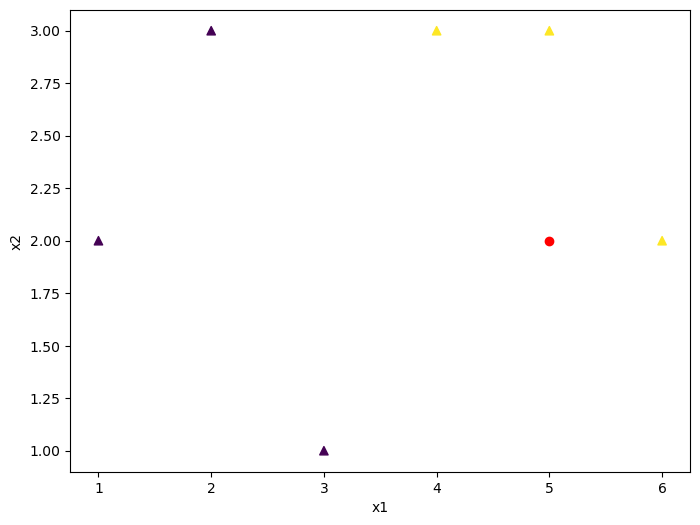

In [142]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [143]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

torch의 Dataset처럼 나중에 iterator를 편하게 사용하기 위한 Dataset 객체인 것 같다.

In [144]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [145]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp((tf.matmul(features, W) + b)))
    return hypothesis

hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b)) 강의자료에는 이렇게 나와있는데 -붙이는게 맞는거 아닌가

In [146]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [147]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [148]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [149]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874


Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000


In [150]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)
print(xy)

(759, 8) (759, 1)
[[-0.294118   0.487437   0.180328  ... -0.53117   -0.0333333  0.       ]
 [-0.882353  -0.145729   0.0819672 ... -0.766866  -0.666667   1.       ]
 [-0.0588235  0.839196   0.0491803 ... -0.492741  -0.633333   0.       ]
 ...
 [-0.411765   0.21608    0.180328  ... -0.857387  -0.7        1.       ]
 [-0.882353   0.266332  -0.0163934 ... -0.768574  -0.133333   0.       ]
 [-0.882353  -0.0653266  0.147541  ... -0.797609  -0.933333   1.       ]]


In [151]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [152]:
W = tf.Variable(tf.random.normal((8, 1)), name='weight')
b = tf.Variable(tf.random.normal((1,)), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [153]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [154]:
for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

Iter: 0, Loss: 0.6556


Iter: 100, Loss: 0.6188
Iter: 200, Loss: 0.5980
Iter: 300, Loss: 0.5854
Iter: 400, Loss: 0.5769
Iter: 500, Loss: 0.5704
Iter: 600, Loss: 0.5648
Iter: 700, Loss: 0.5599
Iter: 800, Loss: 0.5555
Iter: 900, Loss: 0.5513
Iter: 1000, Loss: 0.5475
